In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import datetime

In [2]:
#acquire data
train_df  = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
all_df = train_df.append(test_df)

In [3]:
all_df.reset_index(inplace=True, drop=True)

In [4]:
all_df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


## 觀察資料的一些統計值

In [5]:
all_df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.521787e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06
mean,6.004543e+03,8.208741e+04,1.090453e+05,6.516174e+02,4.825625e+00,5.378875e+01,4.142680e+00,1.337572e-02,4.748365e+00,4.841128e-02,5.839281e+01,1.460061e+05,2.979138e+02,5.589230e+04,4.754399e+03,9.562308e+01,2.475286e-02,9.791667e+05
std,1.505735e+03,4.732348e+04,6.110356e+04,4.032183e+02,6.557577e-01,2.076681e+01,2.402570e+00,1.148774e-01,1.114383e+00,3.615652e-01,3.409522e+01,5.227967e+04,7.841150e+01,3.082944e+04,1.982351e+03,1.896446e+01,2.211643e-01,5.654969e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.129400e+04,5.751900e+04,4.300400e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.900000e+01,1.104500e+05,2.500000e+02,3.362500e+04,3.952000e+03,1.020000e+02,0.000000e+00,4.896218e+05
50%,6.678000e+03,8.196600e+04,1.099410e+05,5.887500e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,5.800000e+01,1.513290e+05,2.640000e+02,5.933300e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.794235e+05
75%,6.769000e+03,1.229640e+05,1.621700e+05,8.025400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,8.700000e+01,1.857550e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.468711e+06
max,6.884000e+03,1.638860e+05,2.135750e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,1.200000e+02,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.080000e+02,4.000000e+00,1.959018e+06


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943452 entries, 0 to 1943451
Data columns (total 23 columns):
acqic        int64
bacno        int64
cano         int64
conam        float64
contp        int64
csmcu        int64
ecfg         object
etymd        int64
flbmk        object
flg_3dsmk    object
fraud_ind    float64
hcefg        int64
insfg        object
iterm        int64
locdt        int64
loctm        float64
mcc          int64
mchno        int64
ovrlt        object
scity        int64
stocn        int64
stscd        int64
txkey        int64
dtypes: float64(3), int64(15), object(5)
memory usage: 341.0+ MB


In [7]:
all_df.groupby("fraud_ind").sum()

,acqic,bacno,cano,conam,contp,csmcu,etymd,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
fraud_ind,,,,,,,,,,,,,,,,,
0.0,9042587114,123250593278,163482476248,9.818490e+08,7248321,80778143,6201258,7125821,75449,68109434,2.200713e+11,447178405,83981036021,7149439802,144147015,26497,1454724032904
1.0,100313285,1673308849,2266064645,1.449818e+07,100949,1144577,112810,101769,74,869085,2.589286e+09,6023373,1071978969,86852115,1413678,11327,23123718525


In [8]:
num_features = all_df.select_dtypes(include=['int64',"float64"])
categorical_features = all_df.select_dtypes(include='object')

num_features = num_features.drop(["fraud_ind","txkey"], axis=1)
y_series = all_df.fraud_ind
txkey_series = all_df.txkey

print(num_features.shape)
print(categorical_features.shape)

(1943452, 16)
(1943452, 5)


In [9]:
dummies_list = ["contp","etymd","hcefg","stscd"]
my_dummies_df = num_features[dummies_list]
dummies_df=pd.DataFrame()
# # object_features = categorical_features.select_dtypes(include='object').columns
for name in dummies_list:
    print(name)
    dummies = pd.get_dummies(my_dummies_df[name], drop_first=False)
    dummies = dummies.add_prefix("{}_".format(name))
    dummies_df=pd.concat([dummies_df,dummies],axis=1)

contp
etymd
hcefg
stscd


In [10]:
num_features = num_features.drop(dummies_list, axis=1)

In [11]:
dummies_df.columns

Index(['contp_0', 'contp_1', 'contp_2', 'contp_3', 'contp_4', 'contp_5',
       'contp_6', 'etymd_0', 'etymd_1', 'etymd_2', 'etymd_3', 'etymd_4',
       'etymd_5', 'etymd_6', 'etymd_7', 'etymd_8', 'etymd_9', 'etymd_10',
       'hcefg_0', 'hcefg_1', 'hcefg_2', 'hcefg_3', 'hcefg_4', 'hcefg_5',
       'hcefg_6', 'hcefg_7', 'hcefg_8', 'hcefg_9', 'stscd_0', 'stscd_1',
       'stscd_2', 'stscd_3', 'stscd_4'],
      dtype='object')

In [12]:
categorical_features["null"] = categorical_features["flbmk"].isnull()

In [13]:
categorical_features = categorical_features.fillna(0)

In [14]:
categorical_features = categorical_features.replace(["Y", "N"], [1, 0 ])

In [15]:
# num_features[30:35]

In [16]:
# num_features.groupby("iterm").sum()

In [17]:
categorical_features.head()

,ecfg,flbmk,flg_3dsmk,insfg,ovrlt,null
0,0,0,0,0,0,False
1,0,0,0,0,0,False
2,0,0,0,0,0,False
3,0,0,0,0,0,False
4,0,0,0,0,0,False


In [18]:
scaler = StandardScaler()

num_features_arr = scaler.fit_transform(num_features.values)

num_features = pd.DataFrame(data=num_features_arr,index=num_features.index,columns=num_features.columns)

num_features.head()

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,scity,stocn
0,0.582079,0.658734,-1.162081,-0.341794,-2.590131,-0.133894,-0.744762,0.509681,2.028863,0.111604,-2.398364,0.336256
1,-3.987783,1.107708,-1.036278,-0.461282,-2.590131,-0.133894,-1.448673,-0.782179,1.952344,-1.812952,0.536031,0.336256
2,0.582079,-1.409013,1.297514,-0.341794,-2.590131,-0.133894,-1.536662,0.123412,2.028863,0.111604,-2.398364,0.336256
3,0.472498,1.586350,-1.294169,0.903959,0.395402,-0.133894,-1.565992,0.515305,-0.649316,-0.176983,-0.743258,0.336256
4,-0.019621,0.504984,-0.453988,0.153869,0.395402,-0.133894,-1.536662,0.690956,-0.445264,1.228783,0.536031,0.336256


In [19]:
# categorical_features=categorical_features.drop(columns="flbmk",axis=1)
# categorical_features.columns

In [20]:
final_data=pd.concat([num_features,categorical_features,dummies_df],axis=1)
final_data.shape

(1943452, 51)

In [21]:
final_data["txkey"] = txkey_series
final_data["fraud_ind"] = y_series

In [22]:
train_df = final_data[:len(train_df)]

In [23]:
test_df = final_data[len(train_df):]

In [24]:
test_df = test_df.drop("fraud_ind", axis=1)

In [25]:
test_df.head()

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,...,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,txkey
1521787,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.278983,1.325983,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,592489
1521788,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.278983,1.453738,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,592452
1521789,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.220324,0.459202,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,590212
1521790,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.220324,0.380797,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,590209
1521791,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.278983,1.325658,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,592488


In [26]:
train_df.head()

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,...,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,txkey,fraud_ind
0,0.582079,0.658734,-1.162081,-0.341794,-2.590131,-0.133894,-0.744762,0.509681,2.028863,0.111604,...,0,0,0,1,0,0,0,0,516056,0.0
1,-3.987783,1.107708,-1.036278,-0.461282,-2.590131,-0.133894,-1.448673,-0.782179,1.952344,-1.812952,...,0,0,0,1,0,0,0,0,4376,0.0
2,0.582079,-1.409013,1.297514,-0.341794,-2.590131,-0.133894,-1.536662,0.123412,2.028863,0.111604,...,0,0,0,1,0,0,0,0,483434,0.0
3,0.472498,1.586350,-1.294169,0.903959,0.395402,-0.133894,-1.565992,0.515305,-0.649316,-0.176983,...,0,0,0,1,0,0,0,0,1407164,0.0
4,-0.019621,0.504984,-0.453988,0.153869,0.395402,-0.133894,-1.536662,0.690956,-0.445264,1.228783,...,0,0,0,1,0,0,0,0,1051004,0.0


In [27]:
train_df[train_df["fraud_ind"] == 1].shape[0]/train_df[train_df["fraud_ind"] == 0].shape[0]

0.013557057529078907

In [28]:
# train_df[train_df["fraud_ind"] == 1]

In [29]:
# random forest
X = train_df.drop(labels=['fraud_ind','txkey'],axis=1)

In [30]:
# X.head()
y = train_df['fraud_ind']

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# split the dataset 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [33]:
X_train.shape

(1369608, 51)

In [34]:
X_train["y_train"] = y_train
int(sum(y_train)*2)

36494

In [35]:
# my_X_train = X_train.sort_values("y_train", ascending=False)
# my_X_train = my_X_train[:int(sum(y_train)*2)]
my_X_1 = X_train[y_train == 1]
my_X_0 = X_train[y_train == 0].sample(n=int(sum(y_train)*25), random_state=82041)
my_X = pd.concat([my_X_0, my_X_1], axis=0)

In [36]:
from sklearn.utils import shuffle

In [37]:
my_X = shuffle(my_X)

In [38]:
my_y_train = my_X['y_train']

In [39]:
my_X_train = my_X.drop(labels=['y_train'],axis=1)

In [40]:
my_X_train

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,...,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4
694692,0.472498,0.869560,0.659122,0.299050,0.395402,-0.133894,-0.275488,0.478273,-0.521784,-0.306924,...,1,0,0,0,0,1,0,0,0,0
282234,-0.014972,-1.381944,0.340990,0.496065,0.395402,-0.133894,0.252446,0.369263,0.664267,-0.968500,...,1,0,0,0,0,1,0,0,0,0
111379,0.472498,0.129145,1.564029,1.087606,0.395402,-0.133894,0.223116,0.463468,-0.649316,-0.696195,...,1,0,0,0,0,1,0,0,0,0
371491,0.150396,-1.552135,0.872007,0.676786,0.395402,-0.133894,-1.448673,-1.044078,0.013852,-1.328610,...,1,0,0,0,0,1,0,0,0,0
1341496,0.018235,1.390802,-0.451321,0.578304,0.395402,-0.133894,-1.536662,-0.093077,-0.598303,0.716935,...,1,0,0,0,0,1,0,0,0,0
751399,0.018235,-1.658805,0.550896,-0.057357,0.395402,-0.133894,-0.451466,-0.584990,-0.088174,0.728677,...,1,0,0,0,0,1,0,0,0,0
194453,-0.123889,-0.600218,-0.823230,-1.616042,0.347249,-0.133894,0.545742,0.365342,0.307177,1.527329,...,0,0,0,0,0,1,0,0,0,0
776171,0.513010,1.224056,1.284896,0.742086,0.395402,-0.133894,-0.187499,1.305096,-0.649316,-1.782819,...,0,0,0,0,0,1,0,0,0,0
479350,0.447261,0.809928,1.169748,-0.930383,0.395402,-0.133894,-1.272695,-2.580374,-0.611056,-1.058057,...,1,0,0,0,0,1,0,0,0,0
386139,-0.019621,-0.246440,1.338478,0.077136,0.395402,-0.133894,-1.507332,-0.383955,0.103125,1.063519,...,1,0,0,0,0,1,0,0,0,0


## Random forest

In [ ]:
# t1 = datetime.datetime.now()

In [42]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=500,
                             min_samples_split=15,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=82041,
                             n_jobs=-1) 

rf.fit(my_X_train, my_y_train)
print("%.4f" % rf.oob_score_)

0.9822


In [43]:
# t2 = datetime.datetime.now()
# print((t2-t1).seconds)

In [44]:
y_pred = rf.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[149544,    527],
       [   588,   1520]])

In [46]:
(1307+661)/1307

1.5057383320581483

In [47]:
(1307+420)/1307

1.3213465952563122

In [41]:
def get_f1_score(confusion_matrix, i):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for j in range(len(confusion_matrix)):
        if (i == j):
            # true positive: 真實為i，預測為i (confusion matrix 中的對角線項目)
            TP += confusion_matrix[i, j]
            tmp = np.delete(confusion_matrix, i, 0)
            tmp = np.delete(tmp, j, 1)
            # true negative: 真實不為i, 預測不為i (confusion matrix 中, row=col=i 以外的項目總合)
            TN += np.sum(tmp)
        else:
            if (confusion_matrix[i, j] != 0):
                # false negative: 真實為i, 預測不為i (confusion matrix中, row i 上不為0的總數)
                FN += confusion_matrix[i, j]
            if (confusion_matrix[j, i] != 0):
                # false positive: 真實不為i, 預測為i (confusion matrix中, col i 上不為0的總數)
                FP += confusion_matrix[j, i]

    recall = TP / (FN + TP)
    precision = TP / (TP + FP)
    f1_score = 2 * 1/(1/recall + 1/precision)
    
    return f1_score

In [42]:
get_f1_score(conf_mat,1)

NameError: name 'conf_mat' is not defined

In [43]:
y_pred.sum()/len(y_pred)

NameError: name 'y_pred' is not defined

In [51]:
x_submit = test_df.drop(labels=['txkey'],axis=1)
pred = rf.predict(x_submit)

In [52]:
submit = pd.DataFrame({"txkey": test_df['txkey'],
                      "fraud_ind":pred.astype(int)})

In [53]:
submit.to_csv('submission06.csv', index=False)

In [54]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.011058541733366536

## Xgboost

In [56]:
# warnings.filterwarnings('ignore')
# parameters= {'n_estimators':[10], 'learning_rate':[0.01], 'max_depth':[12],\
#              "gamma":[0], "scale_pos_weight": [1]}
# eval_set =  [(X_test, y_test)]
parameters= {'n_estimators':10}
xgb_model = XGBClassifier(n_estimators=500,
                          max_depth=12,
                          learning_rate=0.02,
                          predictor="gpu_predictor",
                          tree_method="gpu_hist")
xgb_model.fit(my_X_train, my_y_train,
              verbose=True,
              eval_metric="auc")
# xgb_best_model = RandomizedSearchCV(xgb_model, parameters, cv=3, scoring='accuracy', return_train_score='cv_results_')
# xgb_best_model.fit(my_X_train, my_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       predictor='gpu_predictor', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='gpu_hist')

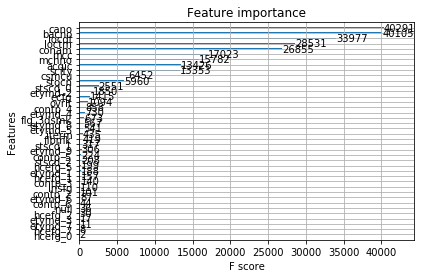

In [57]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

In [58]:
y_pred = xgb_model.predict(X_test)

In [59]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[149544,    527],
       [   588,   1520]])

In [60]:
get_f1_score(conf_mat,1)

0.7316486161251504

In [ ]:
# t2 = datetime.datetime.now()
# print((t2-t1).seconds)


## Logistic regression

In [ ]:
# parameters = {'penalty': ['l2'], 'max_iter': [100, 150,200],
#                      'C': [1, 10, 100, 1000]}

# logistic_model = LogisticRegression()
# #logistic_model.fit(scale_all['StandardScaler']['x_train'], Y_train)
# logistic_best_model = RandomizedSearchCV(logistic_model, parameters, cv=5, scoring='accuracy', return_train_score='cv_results_')
# logistic_best_model.fit(X_train, y_train)

# logistic_best_model.best_estimator_

In [ ]:
# logistic_best_model.score(X_test, y_test)

## ensemble by voting

In [ ]:
# vclf = VotingClassifier(estimators=[('svc', svc_best_model), ('rf', rf), ('xgb', xgb_best_model), ('lg', logistic_best_model)])

In [ ]:
# vclf.fit(X_train, y_train)

In [ ]:
# vclf.score(X_test, y_test)

In [61]:
x_submit = test_df.drop(labels=['txkey'],axis=1)
pred = xgb_model.predict(x_submit)

In [62]:
submit = pd.DataFrame({"txkey": test_df['txkey'],
                      "fraud_ind":pred.astype(int)})

In [63]:
submit.to_csv('submission08.csv', index=False)

In [64]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.010721781509017822

In [95]:
my_df04 = pd.read_csv('./submission06.csv')

In [96]:
my_df05 = pd.read_csv('./submission07.csv')

In [97]:
sum(my_df04.fraud_ind != my_df05.fraud_ind)

1870